<a href="https://colab.research.google.com/github/alanrrv/IT304S_Grupo10_UFPR/blob/main/IT304S_Grupo10_UFPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análise de Dados de Energia - UFPR
Grupo 10

Prof. Dr Luiz Carlos

Integrantes:

*   Alan
*   Diogo
*   Henrique
*   Rafael

# Parte 2

7. Vale a pena migrar para o Mercado Livre? Como consumidor livre ou especial?


In [14]:
!git clone https://github.com/alanrrv/IT304S_Grupo10_UFPR

Cloning into 'IT304S_Grupo10_UFPR'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [15]:
import pandas as pd

In [17]:
abas_de_excel = pd.ExcelFile("/content/IT304S_Grupo10_UFPR/FATURAS - UFPR_R02.xlsx"
)
abas_de_excel.sheet_names


['Apresentação',
 'UC1',
 'UC2',
 'UC3',
 'UC4',
 'UC5',
 'Dados Consolidados',
 'Geral']

In [18]:
UC1 = abas_de_excel.parse("UC1")
UC1.shape

(36, 31)

In [19]:
UC1.head()

,DATA,ANO,MÊS,PERIODO,PIS/PASEP,COFINS,ICMS,DEMANDA_CONTRATADA_P,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,DEMANDA_ISENTA_P,DEMANDA_ISENTA_FP,TAR_TUSD_KW_P,TAR_TUSD_KW_FP,ENERGIA_PONTA,ENERGIA_FPONTA,TAR_TUSD_KWH_P,TAR_TUSD_KWH_FP,TAR_TE_KWH_P,TAR_TE_KWH_FP,REAT_KVAR_PONTA,REAT_KVAR_FPONTA,TAR_REAT_PONTA,TAR_REAT_FPONTA,VALOR_DA_FATURA,CONSUMO_TOTAL,Acrescimo_Bamar,Acrescimo_Bverm1,Acrescimo_Bverm2,Categoria_Tarifa
0,2017-01-20,2017,1,31,0.73,3.37,0.29,0,2100,938.88,1679.04,0,420.86,14.6,14.6,50094,554587,0.84218,0.06039,0.43634,0.27472,97,995,0.460392,0.460675,348995.54,604681,0.00,0.0,0.0,VERDE
1,2017-02-20,2017,2,31,0.80,3.70,0.29,0,2100,1039.68,2183.04,0,0.00,14.6,14.6,52906,670533,0.84218,0.06039,0.43634,0.27472,65,1114,0.460392,0.460675,418896.94,723439,0.00,0.0,0.0,VERDE
2,2017-03-20,2017,3,28,0.89,4.06,0.29,0,2100,1411.00,2278.08,0,0.00,14.6,14.6,65969,659486,0.84218,0.06039,0.43634,0.27472,125,945,0.460392,0.460675,454546.88,725455,17219.86,0.0,0.0,VERDE
3,2017-04-20,2017,4,31,0.97,4.48,0.29,0,2100,1468.80,2226.24,0,0.00,14.6,14.6,68729,699426,0.84218,0.06039,0.43634,0.27472,0,727,0.460392,0.460675,445295.39,768155,6789.30,24894.2,0.0,VERDE
4,2017-05-20,2017,5,30,1.07,4.93,0.29,0,2100,1540.80,1952.64,0,147.36,14.6,14.6,60056,621031,0.84218,0.06039,0.43634,0.27472,0,360,0.460392,0.460675,418867.77,681087,0.00,31364.0,0.0,VERDE


In [20]:
import numpy as np

In [21]:
np.nan + np.nan

nan

In [23]:
np.nan == np.nan

False

In [24]:
np.isnan(np.nan)

True

# Visualização de dados faltantes

In [25]:
import missingno as msno


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


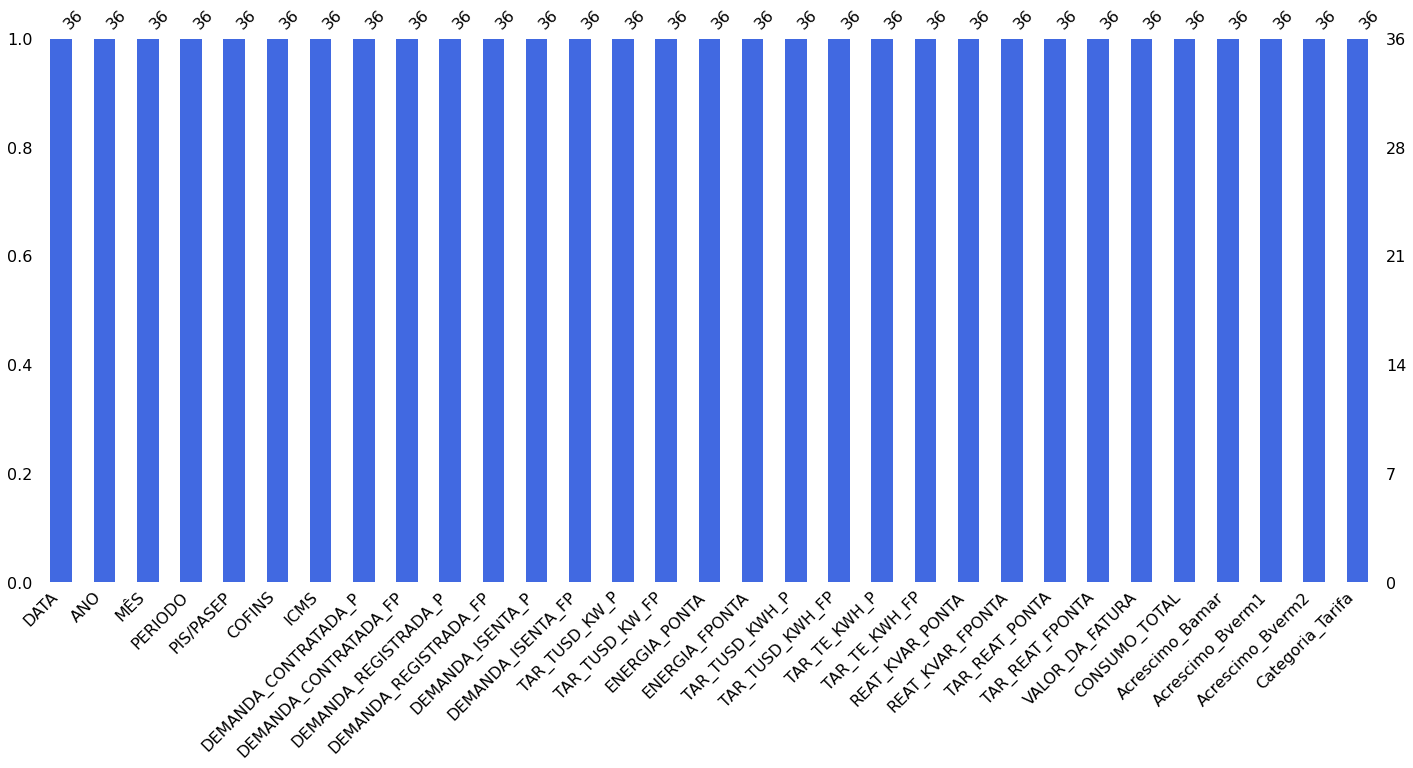

In [26]:
msno.bar(UC1, color="RoyalBlue") #para visualizar a integridade do datafram


#Visualização de Variáveis

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

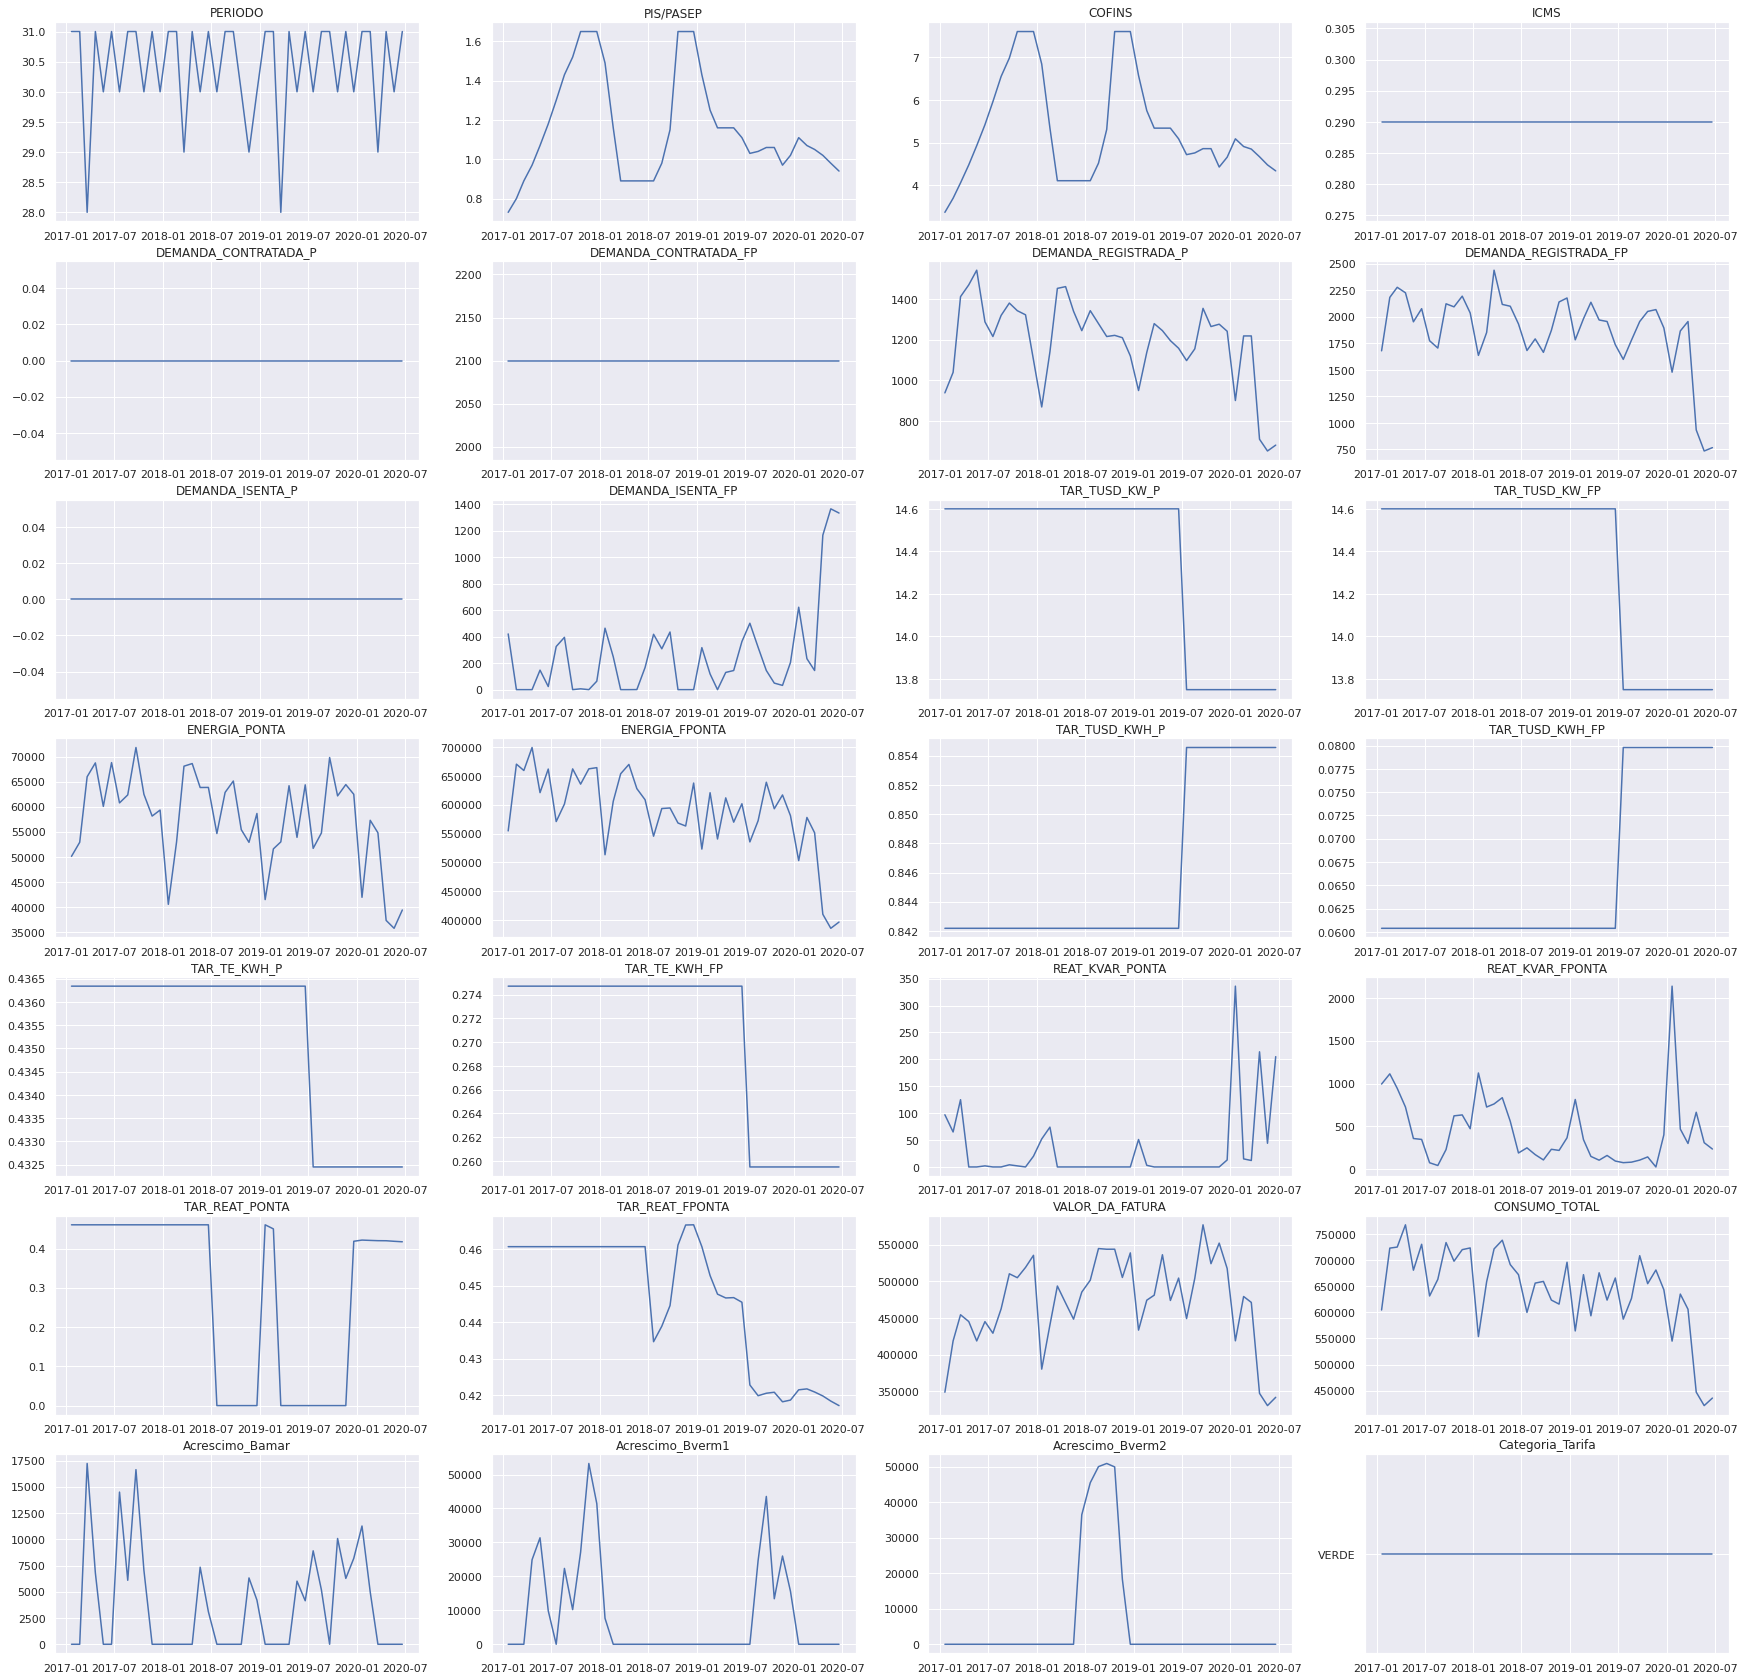

In [ ]:
f, axs = plt.subplots(10, 3,figsize=(30,30))
for i,col in enumerate(UC1.columns[3:]):
  plt.subplot(7, 4, i+1)
  plt.title(col)
  plt.plot(UC1.DATA, UC1[col])

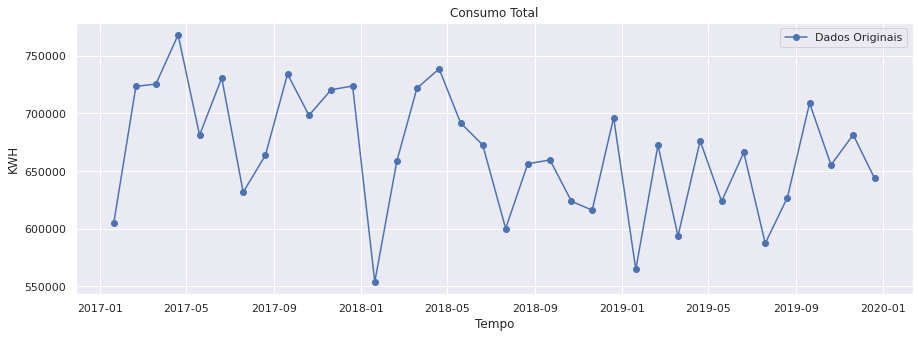

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1.DATA, UC1.CONSUMO_TOTAL, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend(['Dados Originais'])
_ = plt.title("Consumo Total")
plt.show()

#Modelagem

In [35]:
df_train = UC1["CONSUMO_TOTAL"].iloc[:24]
df_test = UC1["CONSUMO_TOTAL"].iloc[24:] 
#Deslocamento dos gráficos

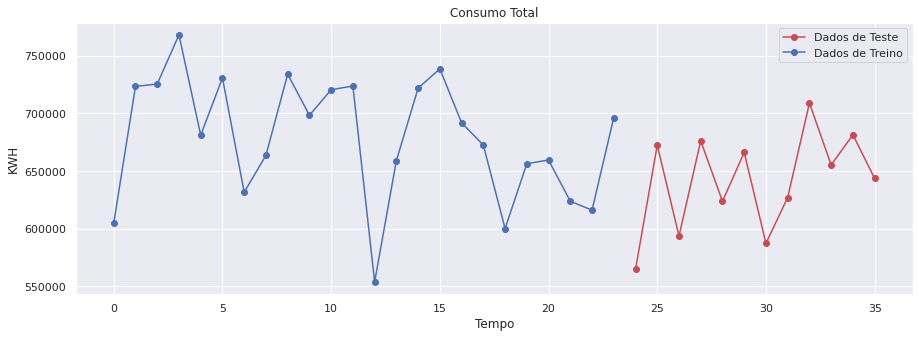

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Teste', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

In [37]:
! pip install pmdarima


Após instalar pmdarima é necessário rodar todas as variáveis novamente.

In [38]:
import pandas as pd
abas_de_excel = pd.ExcelFile("/content/IT304S_Grupo10_UFPR/FATURAS - UFPR_R02.xlsx"
)
abas_de_excel.sheet_names
UC1 = abas_de_excel.parse("UC1")
UC1.shape
import numpy as np
from pmdarima.arima import auto_arima
from fancyimpute import KNN


/usr/local/lib/python3.6/dist-packages/fancyimpute/solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/36 with 0 missing, elapsed time: 0.001


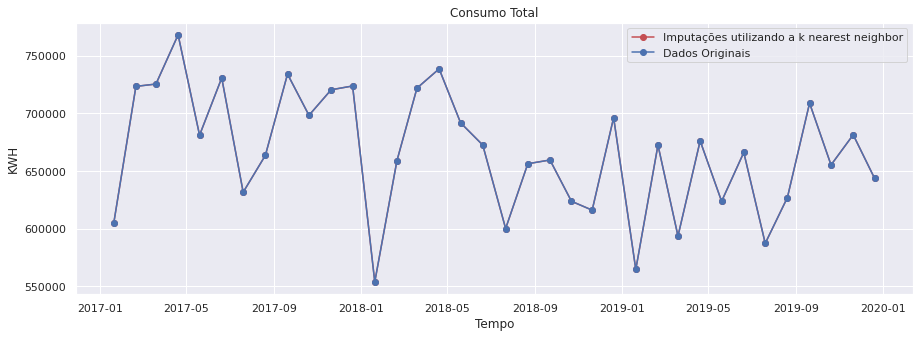

In [41]:
UC1_KNN = UC1.copy(deep= True)
knn_imputer = KNN()
UC1_KNN['CONSUMO_TOTAL'] = knn_imputer.fit_transform(UC1_KNN[['CONSUMO_TOTAL']]).ravel()
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_KNN.DATA, UC1_KNN.CONSUMO_TOTAL, marker='o', color="r")
_ = plt.plot(UC1.DATA, UC1.CONSUMO_TOTAL, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend(['Imputações utilizando a k nearest neighbor', 'Dados Originais'])
_ = plt.title("Consumo Total")
plt.show()

#Imputaçoes utilizando valores próximos

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

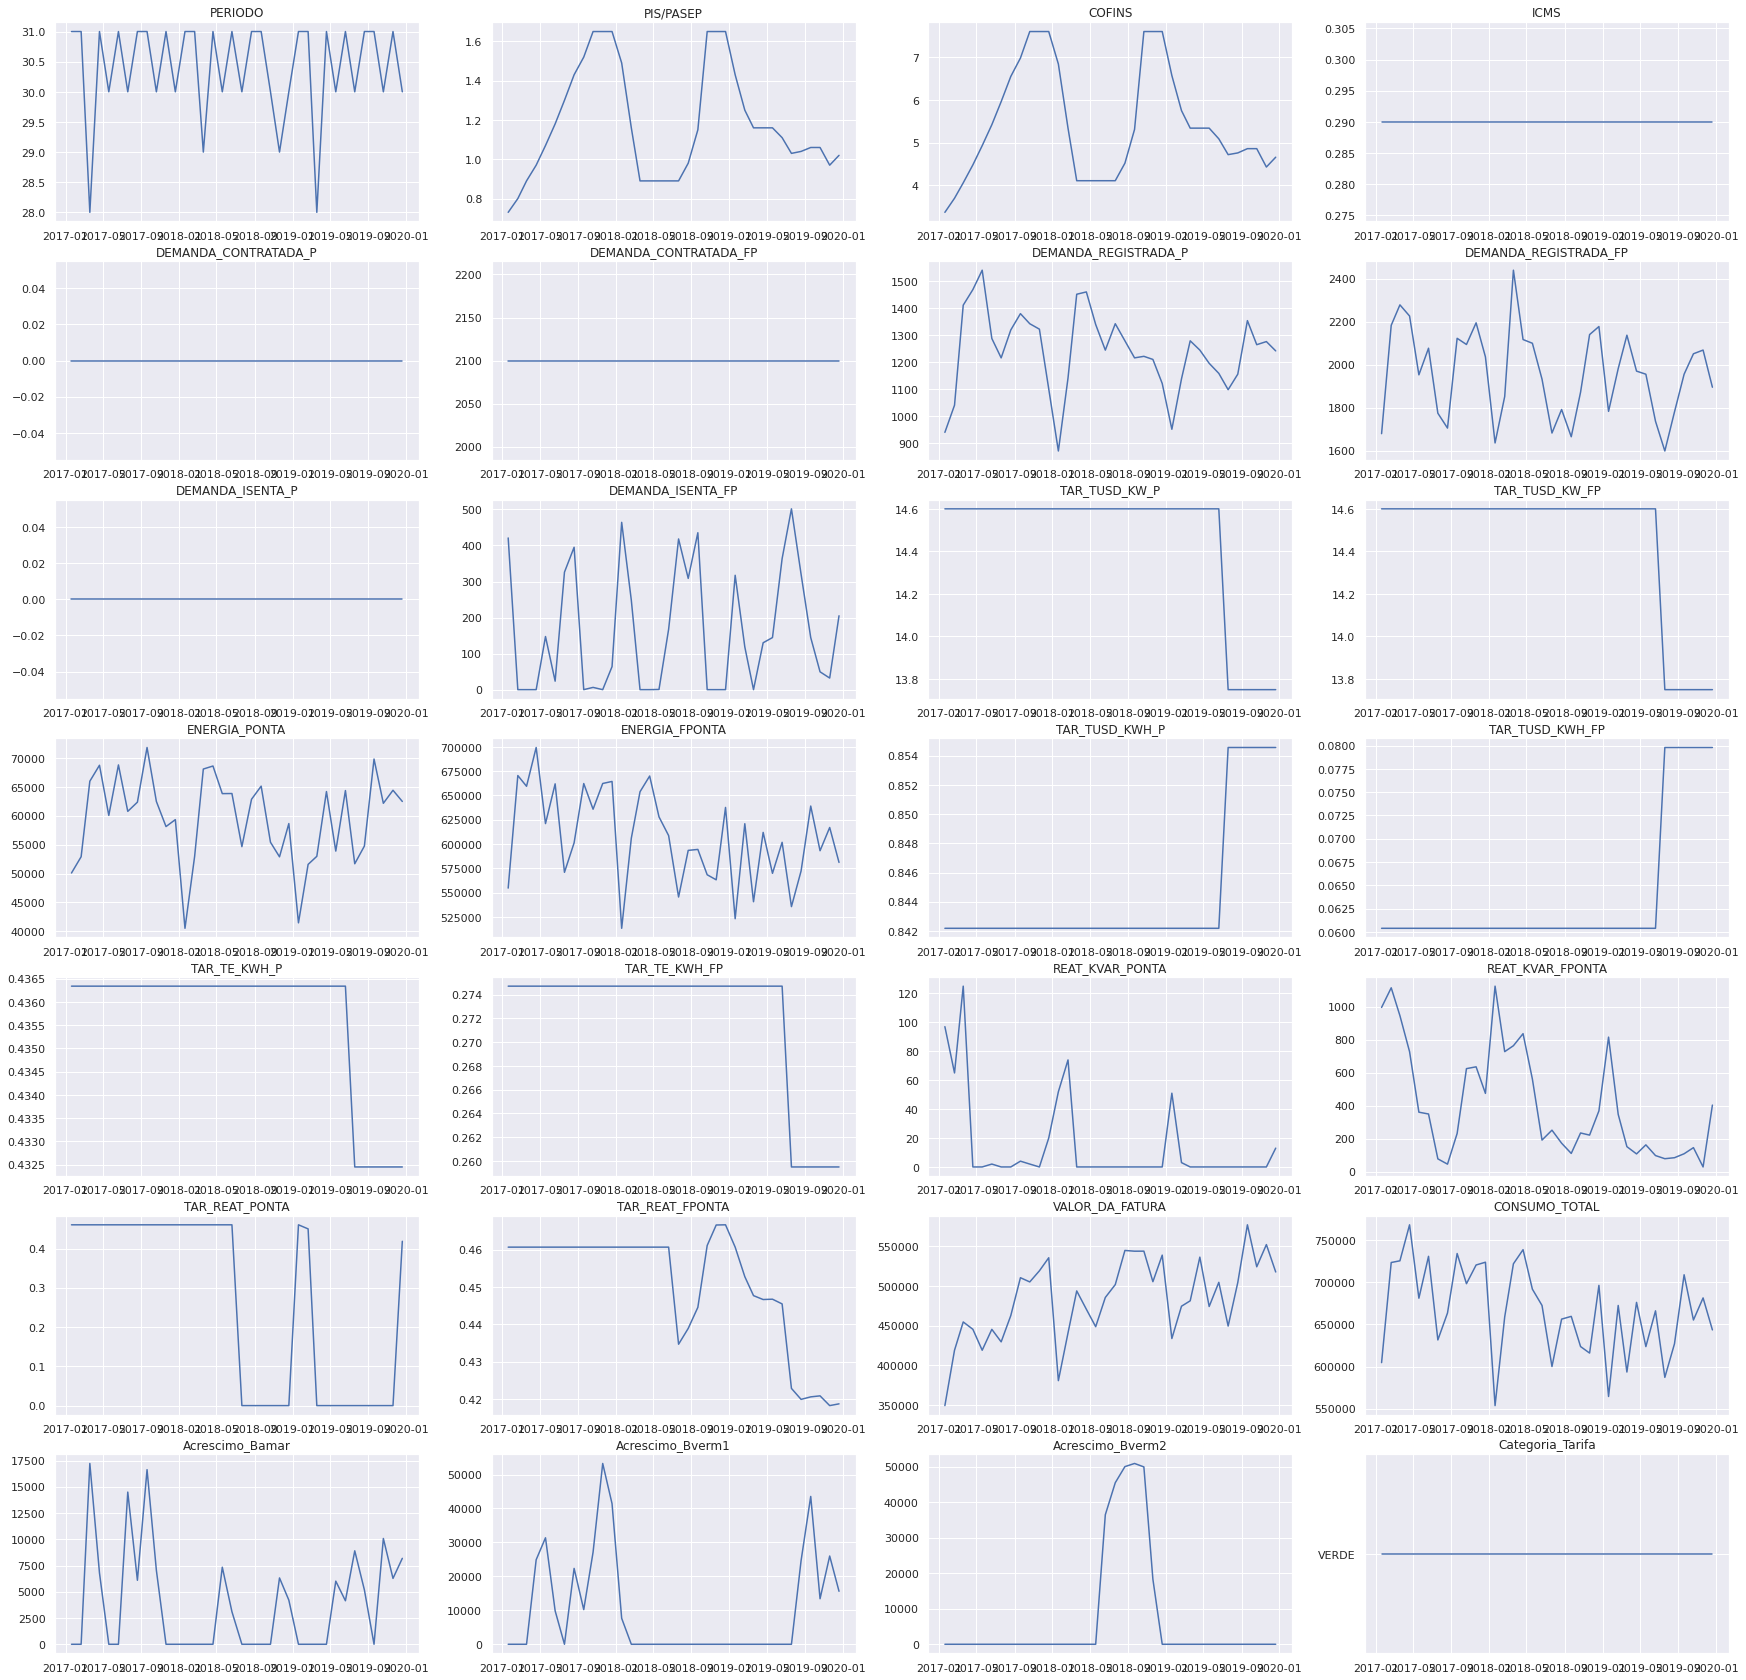

In [43]:
f, axs = plt.subplots(10, 3,figsize=(30,30))
for i,col in enumerate(UC1.columns[3:]):
  plt.subplot(7, 4, i+1)
  plt.title(col)
  plt.plot(UC1.DATA, UC1[col])

In [44]:
def z_score (data, treshold =4):
  outliers = []
  treshold = treshold
  mean, std = np.mean(data), np.std(data)
  for i in data:
    zscore = (i-mean)/std
    if np.abs(zscore) > treshold:
      outliers.append(i)
  
  return outliers

In [50]:
df_train = UC1["CONSUMO_TOTAL"].iloc[:18]
df_test = UC1["CONSUMO_TOTAL"].iloc[18:]

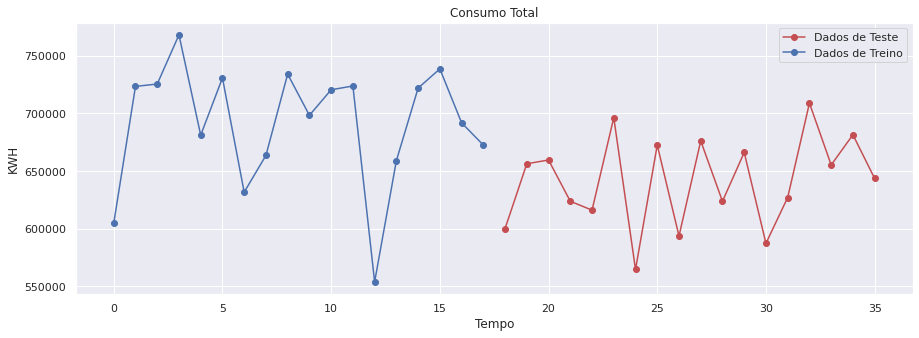

In [51]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Teste', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

In [52]:
from pmdarima.arima import ADFTest


In [53]:
adf_test = ADFTest(alpha=0.05)

In [54]:
adf_test.should_diff(df_train)

(0.06611376984103612, True)

In [55]:
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=125.624, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=125.039, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=124.657, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=126.990, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=126.404, Time=0.22 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=126.423, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=124.404, Time=0.09 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=126.404, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=128.404, Time=0.30 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=124.132, Time=0.05 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=126.132, Time=0.11 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=125.902, Time=0.11 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=123.928, Time=0.05 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=125.814, Time=0.13 sec
 ARIMA(0,1,0)(1,1,2)[12]         

/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,1,1)(0,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


In [56]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   18
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -59.964
Date:                              Wed, 20 Jan 2021   AIC                            123.928
Time:                                      03:40:23   BIC                            123.147
Sample:                                           0   HQIC                           121.832
                                               - 18                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.4142      0.687     -0.603      0.547      -1.761       0.932
sigma2      1.824e+09   7.95e-11   2.29e+19      0.000    1.82e+09    1.82e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.22
Prob(Q):                              1.00   Prob(JB):                         0.90
Heteroskedasticity (H):               0.59   Skew:                            -0.15
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.29e+36. Standard errors may be unstable.
"""

In [58]:
predicoes = pd.DataFrame(arima_model.predict(n_periods = 18), index =df_test.index)
predicoes.columns = ['predicoes']

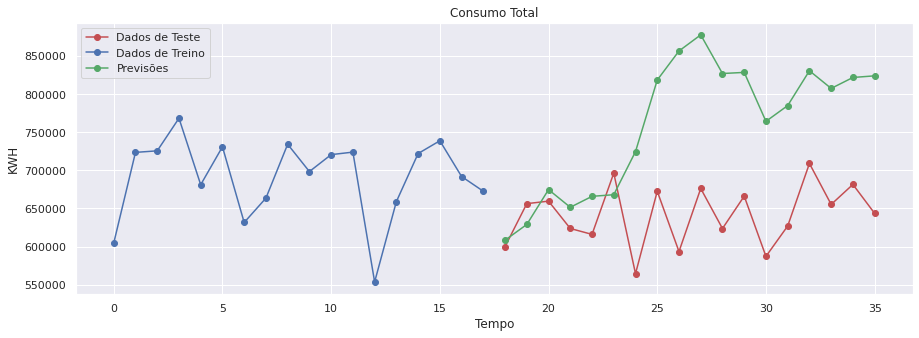

In [71]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Teste', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

#Avaliação

In [59]:
def RMSE(yh, y):
  er = yh - y
  RMSE = sum(er*er/len(er))**0.5
  return RMSE

In [60]:
np.mean(RMSE(df_test.values, predicoes.values))

146394.76374235842

In [62]:
Melhor_RMSE = dict.fromkeys(["RMSE_KNN","RMSE_FFILL", "RMSE_Quadratica"])

#Experimento Imputação por Interpolação Quadrática para previsão de 6 meses CONSUMO_TOTAL

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=424.578, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=423.870, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=423.748, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=423.972, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=424.608, Time=0.22 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=424.011, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=423.897, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=425.810, Time=0.55 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=422.009, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=423.295, Time=0.17 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=422.923, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=425.179, Time=0.03 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=424.890, Time=0.35 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=423.720, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]         

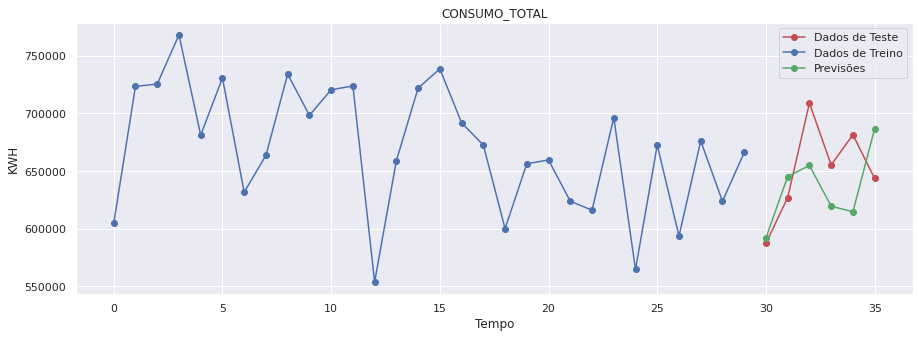

RMSE_Quadratica 48758.06853573621


In [75]:
abas_de_excel =  pd.ExcelFile("/content/IT304S_Grupo10_UFPR/FATURAS - UFPR_R02.xlsx")
abas_de_excel.sheet_names
UC1 = abas_de_excel.parse("UC1")
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.5]), 1)
UC1_quadratica = UC1_df.copy(deep= True)
UC1_quadratica['CONSUMO_TOTAL'].interpolate(method = 'quadratic', inplace = True)
df_train = UC1_quadratica["CONSUMO_TOTAL"].iloc[:30]
df_test = UC1_quadratica["CONSUMO_TOTAL"].iloc[30:]
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)
arima_model.summary()
predicoes = pd.DataFrame(arima_model.predict(n_periods = 6), index =df_test.index)
predicoes.columns = ['predicoes']

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Teste', 'Dados de Treino', 'Previsões'])
_ = plt.title("CONSUMO_TOTAL")
plt.show()

RMSE_Quadratica = np.mean(RMSE(df_test.values, predicoes.values))
Melhor_RMSE.update({"RMSE_Quadratica": RMSE_Quadratica})
print("RMSE_Quadratica", RMSE_Quadratica)

#Experimento FFILL para previsão de 6 meses CONSUMO_TOTAL¶


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=424.578, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=423.870, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=423.748, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=423.972, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=424.608, Time=0.22 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=424.011, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=423.897, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=425.810, Time=0.54 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=422.009, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=423.295, Time=0.17 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=422.923, Time=0.16 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=425.179, Time=0.04 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=424.890, Time=0.37 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=423.720, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[12]         

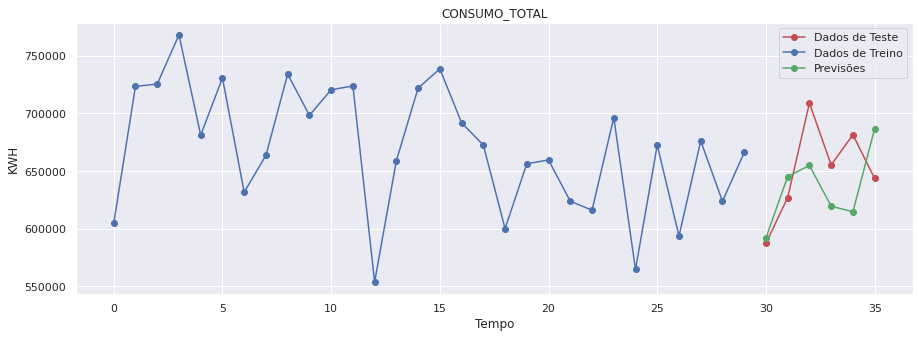

RMSE_FFILL: 48758.06853573621


In [76]:
abas_de_excel =  pd.ExcelFile("/content/IT304S_Grupo10_UFPR/FATURAS - UFPR_R02.xlsx")
abas_de_excel.sheet_names
UC1 = abas_de_excel.parse("UC1")
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.5]), 1)
UC1_ffill = UC1_df.fillna(method='ffill')
df_train = UC1_ffill["CONSUMO_TOTAL"].iloc[:30]
df_test = UC1_ffill["CONSUMO_TOTAL"].iloc[30:]
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)
arima_model.summary()
predicoes = pd.DataFrame(arima_model.predict(n_periods = 6), index =df_test.index)
predicoes.columns = ['predicoes']

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Teste', 'Dados de Treino', 'Previsões'])
_ = plt.title("CONSUMO_TOTAL")
plt.show()

RMSE_FFILL = np.mean(RMSE(df_test.values, predicoes.values))
Melhor_RMSE.update({"RMSE_FFILL": RMSE_FFILL})
print("RMSE_FFILL:",RMSE_FFILL)

#Experimento KNN para previsão de 6 meses CONSUMO_TOTAL


In [68]:
from fancyimpute import KNN


/usr/local/lib/python3.6/dist-packages/fancyimpute/solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/36 with 0 missing, elapsed time: 0.002
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=424.578, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=423.870, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=423.748, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=423.972, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=424.608, Time=0.22 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=424.011, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=423.897, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=425.810, Time=0.55 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=422.009, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=423.295, Time=0.17 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=422.923, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=425.179, Time=0.03 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=424.890, Time=0.34 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=42

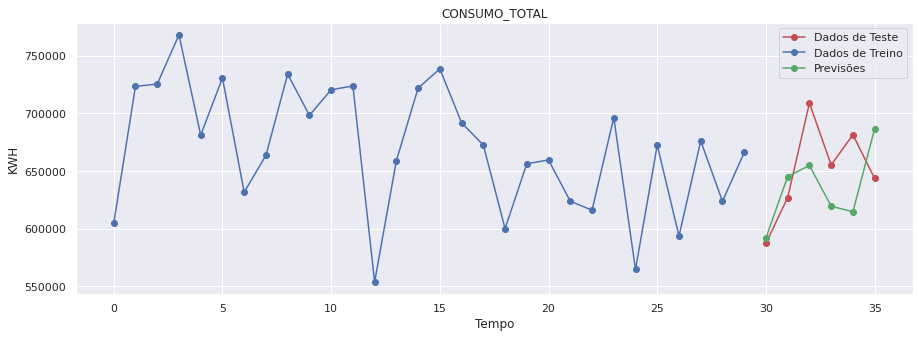

RMSE_KNN: 48758.06853573621


In [77]:
knn_imputer = KNN()
UC1_KNN['CONSUMO_TOTAL'] = knn_imputer.fit_transform(UC1_KNN[['CONSUMO_TOTAL']]).ravel()
df_train = UC1_KNN["CONSUMO_TOTAL"].iloc[:30]
df_test = UC1_KNN["CONSUMO_TOTAL"].iloc[30:]

arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)
arima_model.summary()
predicoes = pd.DataFrame(arima_model.predict(n_periods = 6), index =df_test.index)
predicoes.columns = ['predicoes']

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Teste', 'Dados de Treino', 'Previsões'])
_ = plt.title("CONSUMO_TOTAL")
plt.show()

RMSE_KNN = np.mean(RMSE(df_test.values, predicoes.values))
Melhor_RMSE.update({"RMSE_KNN": RMSE_KNN})
print("RMSE_KNN:",RMSE_KNN)

# DEMANDA TOTAL - Experimento Imputação por Interpolação Quadrática para previsão de 12 meses

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=158.832, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=161.967, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=156.863, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=159.673, Time=0.46 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=158.232, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=158.736, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 2

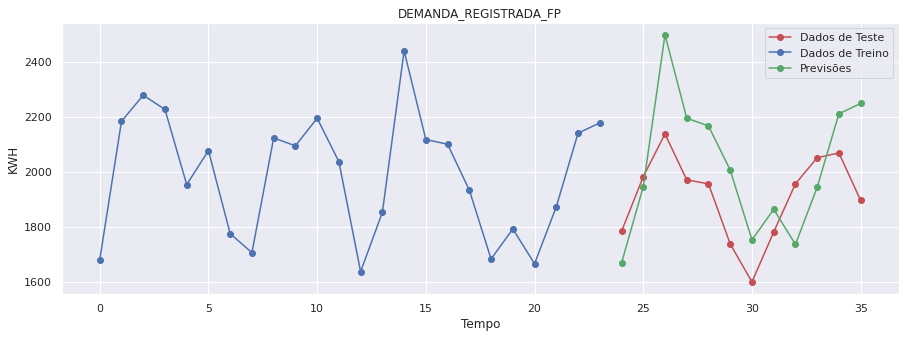

RMSE_Quadratica 293.6664690461136


In [82]:
abas_de_excel =  pd.ExcelFile("/content/IT304S_Grupo10_UFPR/FATURAS - UFPR_R02.xlsx")
abas_de_excel.sheet_names
UC1 = abas_de_excel.parse("UC1")
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.5]), 1)
UC1_quadratica = UC1_df.copy(deep= True)
UC1_quadratica['DEMANDA_REGISTRADA_FP'].interpolate(method = 'quadratic', inplace = True)
df_train = UC1_quadratica["DEMANDA_REGISTRADA_FP"].iloc[:24]
df_test = UC1_quadratica["DEMANDA_REGISTRADA_FP"].iloc[24:]
arima_model = auto_arima(df_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P = 5, max_D = 5, max_Q=5, m=12, seasonal = True, error_action = 'warn', trace = True, supress_warning = True, stepwise = True, random_state= 20, nfits = 50)
arima_model.summary()
predicoes = pd.DataFrame(arima_model.predict(n_periods = 12), index =df_test.index)
predicoes.columns = ['predicoes']

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(predicoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWH")
_ = plt.legend([ 'Dados de Teste', 'Dados de Treino', 'Previsões'])
_ = plt.title("DEMANDA_REGISTRADA_FP")
plt.show()

RMSE_Quadratica = np.mean(RMSE(df_test.values, predicoes.values))
Melhor_RMSE.update({"RMSE_Quadratica": RMSE_Quadratica})
print("RMSE_Quadratica", RMSE_Quadratica)